[('0.300', '0.000'), ('0.400', '0.300'), ('1.100', '0.900'), ('1.200', '0.400'), ('0.800', '0.300'), ('1.500', '0.400'), ('0.800', '0.800'), ('1.100', '0.600'), ('1.100', '0.100'), ('1.300', '0.900'), ('0.100', '0.100'), ('0.000', '0.300'), ('1.100', '1.000'), ('1.400', '0.500'), ('0.700', '0.900'), ('1.400', '0.700'), ('0.600', '0.700'), ('0.100', '0.000'), ('0.100', '0.200'), ('0.000', '0.900'), ('1.300', '0.400'), ('1.000', '0.600'), ('1.300', '0.700'), ('0.700', '0.300'), ('1.100', '0.300'), ('1.400', '0.200'), ('1.000', '0.400'), ('0.600', '0.100'), ('0.500', '0.300'), ('1.400', '1.000'), ('0.300', '0.700'), ('0.000', '0.000'), ('0.300', '0.400'), ('0.800', '0.600'), ('0.000', '1.000'), ('0.900', '0.200'), ('0.200', '0.000'), ('0.900', '0.800'), ('1.200', '0.800'), ('1.500', '0.800'), ('1.500', '0.100'), ('0.700', '0.000'), ('0.100', '0.300'), ('0.200', '0.600'), ('0.400', '0.000'), ('0.400', '1.000'), ('0.600', '0.800'), ('0.900', '0.000'), ('0.100', '0.500'), ('1.000', '0.800'),

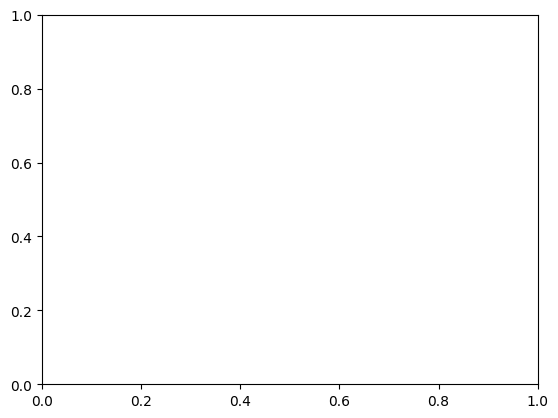

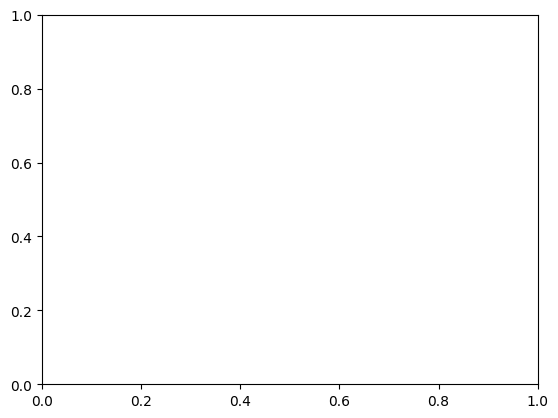

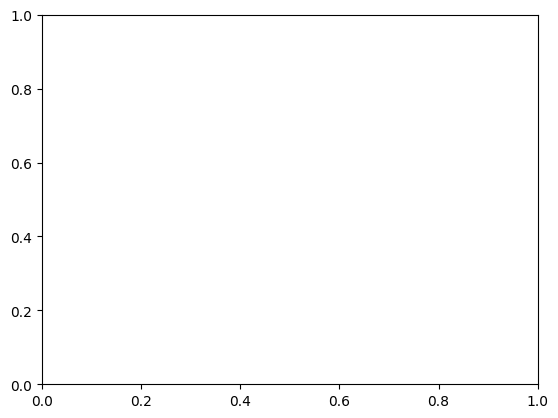

In [6]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue May 20 22:46:47 2025

@author: anteravlic
"""

import numpy as np
import helper
from numpy.polynomial.polynomial import Polynomial
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy.interpolate as interpolate

A = 74
Z = 28
g_A = 1.2


'''
Construction of phase space integrals
'''

poly = helper.fit_phase_space(0, Z, A, 15)
coeffs = Polynomial(poly).coef

n = 30

params = np.loadtxt('params_'+str(n)+'.txt')

test_set = []
with open("test_set.txt", "r") as f:
    for line in f:
        tup = tuple(map(str, line.strip().split(",")))  # Convert back to tuple of integers
        test_set.append(tup)

print(test_set)

'''
These are the indices from the test set that I just set by hand !
'''
idxs = [15,23,40]

x1, orig1, opt1 = helper.data_Lorentzian_for_idx(idxs[0], test_set,n,params, coeffs, g_A)
x2, orig2, opt2 = helper.data_Lorentzian_for_idx(idxs[1], test_set,n,params, coeffs, g_A)
x3, orig3, opt3 = helper.data_Lorentzian_for_idx(idxs[2], test_set,n,params, coeffs, g_A)
'''
Interpolate
'''
f1_orig = interpolate.interp1d(x1, orig1, kind = 'cubic')
f2_orig = interpolate.interp1d(x2, orig2, kind = 'cubic')
f3_orig = interpolate.interp1d(x3, orig3, kind = 'cubic')
f1_opt = interpolate.interp1d(x1, opt1, kind = 'cubic')
f2_opt = interpolate.interp1d(x2, opt2, kind = 'cubic')
f3_opt = interpolate.interp1d(x3, opt3, kind = 'cubic')
xvals = np.linspace(-6,0.7, 1000)



<>:11: SyntaxWarning: invalid escape sequence '\o'
<>:11: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_46805/3885882933.py:11: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel('$\omega$ (MeV)', size = 18)


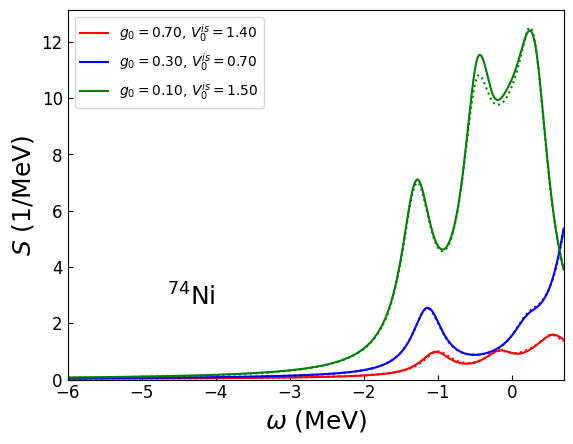

In [3]:

plt.plot(xvals, f1_orig(xvals), color = 'red', label ='$g_0 ='+test_set[idxs[0]][1][:4]+'$, $V_0^{is}='+test_set[idxs[0]][0][:4]+'$')
plt.plot(xvals, f2_orig(xvals), color = 'blue', label ='$g_0 ='+test_set[idxs[1]][1][:4]+'$, $V_0^{is}='+test_set[idxs[1]][0][:4]+'$')
plt.plot(xvals, f3_orig(xvals), color = 'green', label ='$g_0 ='+test_set[idxs[2]][1][:4]+'$, $V_0^{is}='+test_set[idxs[2]][0][:4]+'$')
plt.plot(xvals, f1_opt(xvals), color = 'red', ls = ':')
plt.plot(xvals, f2_opt(xvals), color = 'blue', ls = ':')
plt.plot(xvals, f3_opt(xvals), color = 'green', ls = ':')

plt.xlim(-6,0.7)
plt.ylim(0)

plt.xlabel('$\omega$ (MeV)', size = 18)
plt.ylabel('$S$ (1/MeV)', size = 18)

plt.annotate('${}^{74}$Ni', (0.2,0.2), xycoords='axes fraction', size = 18)

plt.legend()

plt.gca().tick_params(axis="y",direction="in", which = 'both', labelsize = 12)
plt.gca().tick_params(axis="x",direction="in", which = 'both', labelsize = 12)

plt.show()